In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.models import Model
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ari
[nltk_data]     Widyatama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [4]:
with open('data/greeting.json') as file:
    dataGreet = json.load(file)

with open('data/medical-relatedID.json') as file:
    dataMed = json.load(file)

In [5]:
patterns = []
tags = []
responses = {}

for intent in dataGreet['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern)
        tags.append(intent['tag'])
    responses[intent['tag']] = intent['responses']

for intent in dataMed['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern)
        tags.append(intent['tag'])
    responses[intent['tag']] = intent['responses']

print(len(patterns))
print(len(responses))
print(len(tags))
print(patterns[9:])
print(tags[0:9])
print(responses)

263
59
263
['Bagus', 'Keren', 'Hebat', 'Mantap', 'Apa yang bisa kamu bantu', 'Jelaskan apa yang bisa kamu lakukan', 'Layanan apa yang kamu tawarkan', 'Bisakah kamu membantu dengan kesehatan?', 'Apa yang harus dilakukan jika terpotong?', 'Bagaimana cara menyembuhkan luka?', 'Obat apa yang harus dipakai untuk luka?', 'apa yang harus diaplikasikan pada luka?', 'Potongan', 'Bagaimana cara mengobati lecet?', 'Apakah abrasi menimbulkan bekas luka?', 'Lecet', 'apa yang harus dilakukan jika terjadi lecet?', 'Obat apa yang harus digunakan untuk luka lecet?', 'Bagaimana cara menyembuhkan lecet?', 'Bagaimana Anda mengobati Sting?', 'Sengatan', 'Apa yang harus dilakukan jika Anda tersengat?', 'Obat apa yang digunakan jika tersengat?', 'Cara menghilangkan serpihan', 'Bagaimana cara menyembuhkan serpihan?', 'Apa yang harus saya lakukan bila saya terkena serpihan?', 'Bagaimana cara Anda membawa serpihan ke permukaan?', 'Bagaimana cara mengobati terkilir?', 'apa yang harus saya lakukan jika saya terki

In [6]:
SteamPattterns = []

for pattern in patterns:
    stemming = stemmer.stem(pattern)
    SteamPattterns.append(stemming)


In [7]:
print(len(SteamPattterns))
print(len(responses))
print(len(tags))
print(SteamPattterns[0:9])
print(tags[0:9])

263
59
263
['halo pychan', 'halo', 'pychan', 'hai', 'selamat tinggal', 'goodbye', 'selamat jalan', 'terima kasih', 'terimakasih']
['greeting', 'greeting', 'greeting', 'greeting', 'goodbye', 'goodbye', 'goodbye', 'thanks', 'thanks']


In [9]:
def splitDataset(inputs, labels):
    totalData = len(inputs)
    valSize = int(totalData * 0.2)
    valSplit = list(range(0, valSize * 5, 5))
    trainSplit = [i for i in range(totalData) if i not in valSplit]


    trainTexts = [inputs[i] for i in trainSplit]
    valTexts = [inputs[i] for i in valSplit]
    trainLabels = [labels[i] for i in trainSplit]
    valLabels = [labels[i] for i in valSplit]

    trainDataset = tf.data.Dataset.from_tensor_slices((trainTexts, trainLabels))
    valDataset = tf.data.Dataset.from_tensor_slices((valTexts, valLabels))

    return trainDataset, valDataset

In [10]:
trainDataset, valDataset = splitDataset(patterns, tags)

print(f"There are {trainDataset.cardinality()} sentence-label pairs for training.\n")
print(f"There are {valDataset.cardinality()} sentence-label pairs for validation.\n")

print(trainDataset)
print(valDataset)

There are 211 sentence-label pairs for training.

There are 52 sentence-label pairs for validation.

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>


In [11]:
for data in trainDataset.take(10).as_numpy_iterator():
    print(data)

for data in valDataset.take(5).as_numpy_iterator():
    print(data)

(b'Halo', b'greeting')
(b'Pychan', b'greeting')
(b'Hai', b'greeting')
(b'Selamat tinggal', b'goodbye')
(b'selamat jalan', b'goodbye')
(b'Terima kasih', b'thanks')
(b'Terimakasih', b'thanks')
(b'Bagus', b'thanks')
(b'Hebat', b'thanks')
(b'Mantap', b'thanks')
(b'Halo Pychan', b'greeting')
(b'Goodbye', b'goodbye')
(b'Keren', b'thanks')
(b'Layanan apa yang kamu tawarkan', b'pychan')
(b'apa yang harus diaplikasikan pada luka?', b'Potongan')


In [12]:
stopWords = stopwords.words('indonesian')
print(stopWords)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [13]:
def standardizeFunc(sentence):
    stopwords = stopWords
    
    sentence = tf.strings.lower(sentence)

    for word in stopwords:
        if word[0] == "'":
            sentence = tf.strings.regex_replace(sentence, rf"{word}\b", "")
        else:
            sentence = tf.strings.regex_replace(sentence, rf"\b{word}\b", "")
    sentence = tf.strings.regex_replace(sentence, r'[!"#$%&()\*\+,-\./:;<=>?@\[\\\]^_`{|}~\']', "")

    return sentence

In [14]:
maxLeght = 30
def fitVectorizer(trainSentences, standardizeFunc):
  vectorizer = tf.keras.layers.TextVectorization(
    standardize=standardizeFunc,
    output_sequence_length=maxLeght
  )

  vectorizer.adapt(trainSentences)
  return vectorizer

In [15]:
maxLeght = 30
def predVectorizer(trainSentences, standardizeFunc):
  vectorizer = tf.keras.layers.TextVectorization(
    standardize=standardizeFunc,
    output_sequence_length=maxLeght
  )

  stemming = stemmer.stem(trainSentences)

  vectorizer.adapt(stemming)
  return vectorizer

In [16]:
textDataset = trainDataset.map(lambda text, label: text)
vectorizer = fitVectorizer(textDataset, standardizeFunc)
vocabSize = vectorizer.vocabulary_size()

print(f"Vocabulary contains {vocabSize} words\n")

Vocabulary contains 130 words



In [17]:
vocabulary = vectorizer.get_vocabulary()
print("Vocabulary:", vocabulary)
print("Vocabulary size:", len(vocabulary))


Vocabulary: ['', '[UNK]', 'mengobati', 'obat', 'lakukan', 'menyembuhkan', 'minum', 'sakit', 'mengalami', 'luka', 'terkena', 'mata', 'gigitan', 'diminum', 'patah', 'kulit', 'gatal', 'terbakar', 'ringan', 'perawatan', 'pendarahan', 'matahari', 'kepala', 'keracunan', 'hidung', 'cedera', 'bakar', 'alergi', 'mimisan', 'digigit', 'ular', 'tersumbat', 'terserang', 'terkilir', 'tenggorokan', 'rektal', 'reaksi', 'radang', 'panas', 'otot', 'makanan', 'lepuh', 'lecet', 'kaki', 'jari', 'hipotermia', 'dingin', 'demam', 'batuk', 'akibat', 'vertigo', 'tulang', 'testis', 'tertarik', 'tersedak', 'terluka', 'tenggelam', 'strain', 'sinar', 'serpihan', 'serangga', 'ruam', 'pingsan', 'perut', 'nyeri', 'mengatasi', 'memar', 'mataku', 'kimia', 'kelelahan', 'kejang', 'gigi', 'frost', 'diare', 'cpr', 'anjing', 'terbaik', 'stroke', 'sengatan', 'selamat', 'pilek', 'merawat', 'merasakan', 'menghilangkan', 'krim', 'gas', 'berdarah', 'tinggal', 'tersengat', 'terpotong', 'terimakasih', 'terima', 'terbentuk', 'tegang

In [19]:
sample_texts = textDataset.skip(25).take(5) 

for text in sample_texts:
    vectorized_text = vectorizer(tf.constant(text.numpy().decode("utf-8")))
    print(f"Teks asli: {text.numpy().decode('utf-8')}")
    print(f"Vektorisasi: {vectorized_text.numpy()}")


Teks asli: Cara menghilangkan serpihan
Vektorisasi: [83 59  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
Teks asli: Bagaimana cara menyembuhkan serpihan?
Vektorisasi: [ 5 59  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
Teks asli: Apa yang harus saya lakukan bila saya terkena serpihan?
Vektorisasi: [ 4 10 59  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
Teks asli: Bagaimana cara mengobati terkilir?
Vektorisasi: [ 2 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
Teks asli: apa yang harus saya lakukan jika saya terkilir?
Vektorisasi: [ 4 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


In [20]:
def fitLabelEncoder(trainLabel, valLabel):
    trainLabel = list(trainLabel.as_numpy_iterator())
    valLabel = list(valLabel.as_numpy_iterator())
    labels = trainLabel + valLabel

    labelEncoder = tf.keras.layers.StringLookup(num_oov_indices=0)
    labelEncoder.adapt(labels)

    return labelEncoder

In [21]:
trainLabels = trainDataset.map(lambda text, label: label)
valLabels = valDataset.map(lambda text, label: label)

labelEncoder = fitLabelEncoder(trainLabels,valLabels)
uniqLabel = len(labelEncoder.get_vocabulary())

print(f'Unique labels: {labelEncoder.get_vocabulary()}')
print(f'Num of unique labels: {uniqLabel}')

Unique labels: ['gigitan binatang', 'thanks', 'Sakit Mata', 'Luka bakar', 'Lecet', 'Ketegangan', 'Hidung tersumbat', 'Gatal', 'gigitan ular', 'Terbakar sinar matahari', 'Reaksi Alergi', 'Radang dingin', 'Potongan', 'Mimisan', 'Melepuh', 'Mata Gatal', 'Keracunan Makanan', 'Hipotermia', 'Batuk', 'sengatan', 'pychan', 'mimisan', 'kejang', 'greeting', 'Tersedak', 'Terpecah', 'Terkilir', 'Tenggelam', 'Serangan Panas', 'Sakit tenggorokan', 'Sakit kepala', 'Sakit Perut', 'Ruam', 'Resusitasi Jantung Paru (RJP)', 'Racun', 'Pusing', 'Pingsan', 'Perdarahan Normal', 'Pendarahan rektal', 'Patah', 'Otot Tertarik', 'Nyeri Testis', 'Memar', 'Masalah kulit', 'Masalah gastrointestinal', 'Luka Bakar Kimia', 'Luka', 'Kulit terbakar akibat sinar matahari', 'Kelelahan Akibat Panas', 'Jari Kaki Patah', 'Gigitan embun beku', 'Gigitan Serangga', 'Gigi', 'Dingin', 'Diare', 'Demam', 'Cedera Mata', 'Cedera Kepala', 'goodbye']
Num of unique labels: 59


In [22]:
def preprocessDataset(dataset, textVectorizer, labelEncoder):
    dataset = dataset.map(lambda text, label: (textVectorizer(text), labelEncoder(label)))
    dataset = dataset.batch(8)

    return dataset

In [23]:
trainProcDataset = preprocessDataset(trainDataset, vectorizer, labelEncoder)
valProcDataset = preprocessDataset(valDataset, vectorizer, labelEncoder)

print(f"Total train Batch: {trainProcDataset.cardinality()}")
print(f"Total validation Batch: {valProcDataset.cardinality()}")

trainBatch = next(trainProcDataset.as_numpy_iterator())
valBatch = next(valProcDataset.as_numpy_iterator())

print(f"Shape train batch: {trainBatch[0].shape}")
print(f"Shape validation batch: {valBatch[0].shape}")

Total train Batch: 27
Total validation Batch: 7
Shape train batch: (8, 30)
Shape validation batch: (8, 30)


In [24]:
for text, label in trainProcDataset.take(5):
    print("Sample text:", text.numpy())
    print("Sample label:", label.numpy())

for text, label in valProcDataset.take(5):
    print("Sample text:", text.numpy())
    print("Sample label:", label.numpy())

Sample text: [[117   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 96   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [118   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 79  87   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 79 113   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 91 112   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 90   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [127   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

In [29]:
def createModel():
    inputLayer = tf.keras.Input(shape=(None,))

    embedLayer = tf.keras.layers.Embedding(input_dim=vocabSize, output_dim=64)(inputLayer)
    bilLSTM1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False))(embedLayer)
    dense1 = tf.keras.layers.Dense(32, activation='relu')(bilLSTM1)
    dropout1 = tf.keras.layers.Dropout(0.3)(dense1)
    outputLayer = tf.keras.layers.Dense(uniqLabel, activation='softmax')(dropout1)
    
    model = Model(inputs=inputLayer, outputs=outputLayer)

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model

In [30]:
modelPhychan = createModel()
modelPhychan.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, None, 64)       │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 59)             │         1,947 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,443 (314.23 KB)

 Trainable params: 80,443 (314.23 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')

        if train_acc >= 0.9 and val_acc >= 0.9:
            self.model.stop_training = True


In [31]:
history = modelPhychan.fit(trainProcDataset, epochs=50, validation_data=valProcDataset, callbacks=myCallback())

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.0262 - loss: 4.0881 - val_accuracy: 0.0192 - val_loss: 4.0771
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.0613 - loss: 4.0714 - val_accuracy: 0.0192 - val_loss: 4.0776
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.0695 - loss: 4.0732 - val_accuracy: 0.0192 - val_loss: 4.0775
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.0788 - loss: 4.0714 - val_accuracy: 0.0192 - val_loss: 4.0762
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.0788 - loss: 4.0684 - val_accuracy: 0.0192 - val_loss: 4.0718
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.0896 - loss: 4.0642 - val_accuracy: 0.0769 - val_loss: 4.0617
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.1113 - loss: 4.0509 - val_accuracy: 0.0385 - val_loss: 4.0335
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.0231 - loss: 4.0255 - val_accuracy: 0.0385 - 

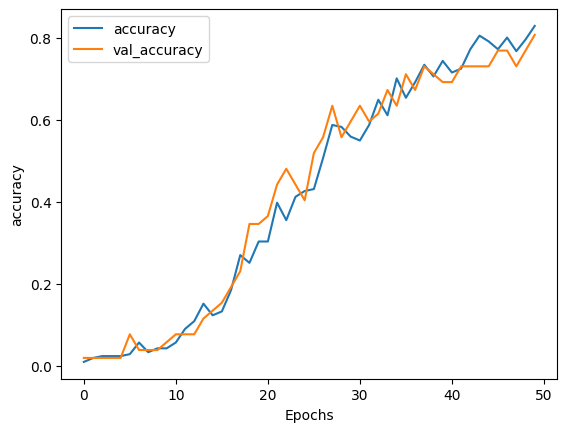

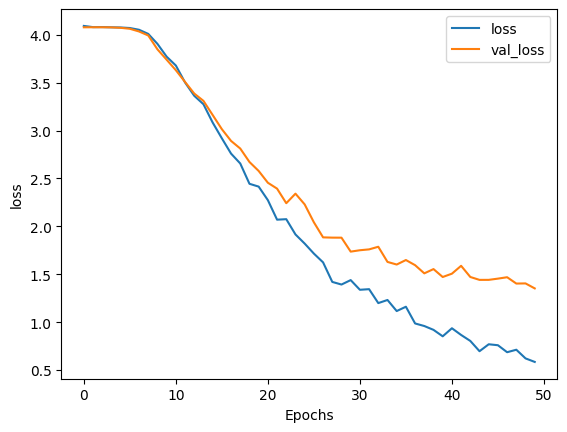

In [32]:
def plotGraphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plotGraphs(history, "accuracy")
plotGraphs(history, "loss")

In [33]:
def getResponse(predictTag, responses, confidence):
    if confidence < 0.4:
        return "Maaf, input yang Anda masukkan kurang jelas."
    return np.random.choice(responses[predictTag])

In [34]:
def showRespon(input):
    inputA = vectorizer([input])
    prediction = modelPhychan.predict(inputA)

    predictClassIndex = np.argmax(prediction, axis=-1)
    confidence = prediction[0][predictClassIndex[0]]
    predictTag = labelEncoder.get_vocabulary()[predictClassIndex[0]]
    response = getResponse(predictTag, responses, confidence)

    return predictTag, response, confidence


In [35]:
testInput = "saya merasa demam"

predictTag, response, confidence = showRespon(testInput)

print(f"Predicted tag: {predictTag}")
print(f"Confidence: {confidence:.2f}")
print(f"Response: {response}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
Predicted tag: Demam
Confidence: 0.83
Response: Untuk mengobati demam di rumah: 1) Minum banyak cairan agar tetap terhidrasi. 2) Kenakan pakaian yang tipis. 3) Gunakan selimut tipis jika Anda merasa kedinginan, hingga rasa dinginnya hilang. 4) Minum asetaminofen (Tylenol, dan lain-lain) atau ibuprofen (Advil, Motrin IB, dan lain-lain). 5) Cari pertolongan medis jika demam berlangsung lebih dari lima hari berturut-turut.
